**Candidate no:291736** 

**Python Version 3.7.9**

In [4]:
# Import necessary libraries
import pandas as pd                     #I used pandas for data manipulation and analysis, particularly for cleaning, transforming, and summarizing the IMDb dataset.
import matplotlib.pyplot as plt         #I used matplotlib to static visualizations, including histograms and other charts, for exploring data distributions.
import seaborn as sns                   #I used seaborn for making statistical graphics easier and more visually appealing.
from scipy.stats import ttest_ind       #I Used scipy for statistical functions and hypothesis testing like the t-test

# Suppress warnings for clarity
import warnings
warnings.filterwarnings('ignore')

# Load IMDb data
file_path = 'movie_metadata.csv'
data = pd.read_csv(file_path)

# Display initial data insights
print("Initial Data Overview:")
print(data.info())
print(data.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes

# **Firstly started with Data Cleaning and Wrangling**

In [24]:
# Define a cleaning function to handle missing data and duplicates

def clean_data(df):
      # Dropping duplicates
    df = df.drop_duplicates()
    
     # Handling missing values (NaNs)
    df = df.dropna(subset=['budget', 'gross', 'imdb_score', 'title_year', 'genres'])    # Critical columns for analysis
    return df

# Apply cleaning
data = clean_data(data)
print("Data after cleaning")
print(data.info())


Data after cleaning
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3857 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3855 non-null   object 
 1   director_name              3857 non-null   object 
 2   num_critic_for_reviews     3856 non-null   float64
 3   duration                   3856 non-null   float64
 4   director_facebook_likes    3857 non-null   float64
 5   actor_3_facebook_likes     3847 non-null   float64
 6   actor_2_name               3852 non-null   object 
 7   actor_1_facebook_likes     3854 non-null   float64
 8   gross                      3857 non-null   float64
 9   genres                     3857 non-null   object 
 10  actor_1_name               3854 non-null   object 
 11  movie_title                3857 non-null   object 
 12  num_voted_users            3857 non-null   int64  
 13  cast_total_facebook_likes  3

# **Exploratory Data Analysis (EDA)**

## After Data Cleaning and Wrangling ,I firstly started finding the top 10 movies by IMDB score and Top 5 gentre for the report purpose

In [25]:
# Top 10 movies by IMDb score
top_10_movies = data.nlargest(10, 'imdb_score')[['movie_title', 'imdb_score', 'genres']]
print("Top 10 Movies by IMDb Score:\n", top_10_movies)

Top 10 Movies by IMDb Score:
                                             movie_title  imdb_score  \
1937                          The Shawshank Redemption          9.3   
3466                                     The Godfather          9.2   
66                                     The Dark Knight          9.0   
2837                            The Godfather: Part II          9.0   
339      The Lord of the Rings: The Return of the King          8.9   
1874                                  Schindler's List          8.9   
3355                                      Pulp Fiction          8.9   
4498                    The Good, the Bad and the Ugly          8.9   
97                                           Inception          8.8   
270   The Lord of the Rings: The Fellowship of the R...         8.8   

                                genres  
1937                       Crime|Drama  
3466                       Crime|Drama  
66         Action|Crime|Drama|Thriller  
2837                    

Top 5 Genres by Count:
 Drama       1944
Comedy      1504
Thriller    1118
Action       962
Romance      880
dtype: int64

Drama Genre Summary Statistics:
 count    1944.000000
mean        6.784877
std         0.891879
min         2.100000
25%         6.300000
50%         6.900000
75%         7.400000
max         9.300000
Name: imdb_score, dtype: float64


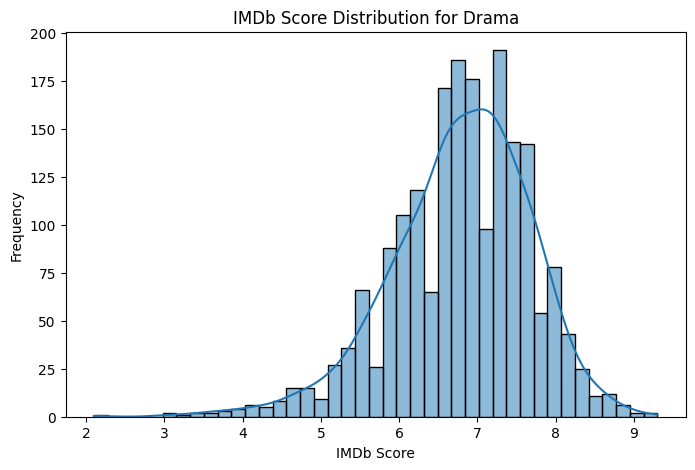


Comedy Genre Summary Statistics:
 count    1504.000000
mean        6.184441
std         1.037640
min         1.900000
25%         5.600000
50%         6.300000
75%         6.900000
max         8.800000
Name: imdb_score, dtype: float64


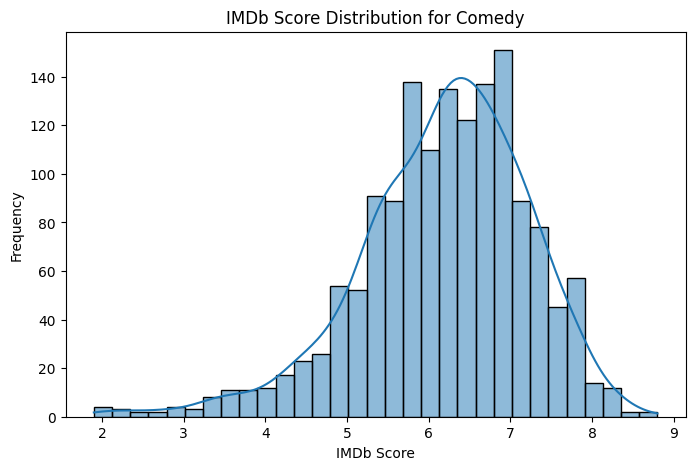


Thriller Genre Summary Statistics:
 count    1118.00000
mean        6.37737
std         0.96601
min         2.70000
25%         5.80000
50%         6.40000
75%         7.00000
max         9.00000
Name: imdb_score, dtype: float64


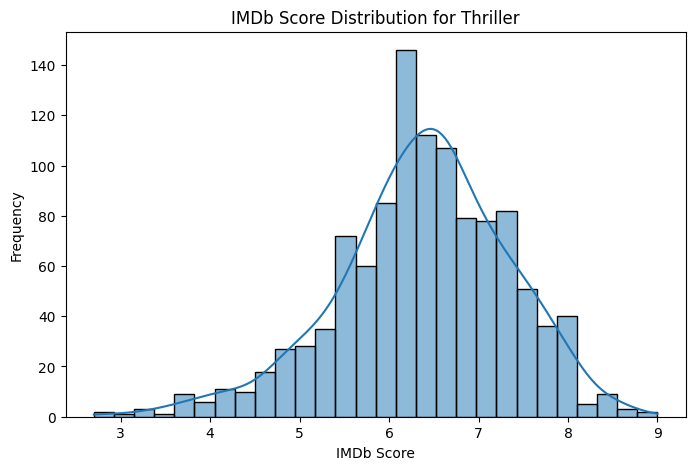


Action Genre Summary Statistics:
 count    962.000000
mean       6.290748
std        1.031385
min        2.100000
25%        5.700000
50%        6.300000
75%        6.900000
max        9.000000
Name: imdb_score, dtype: float64


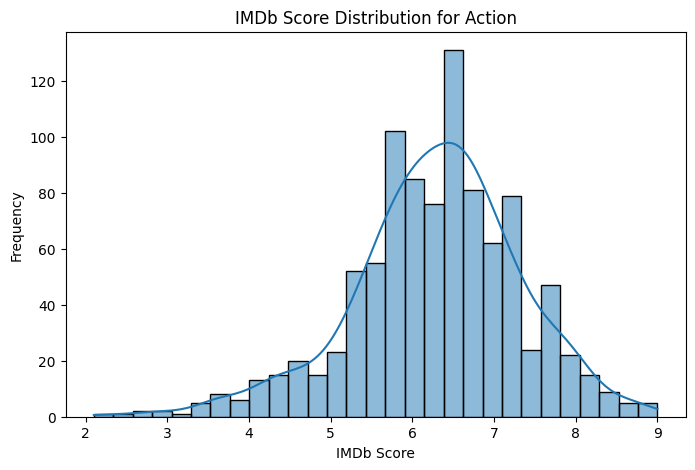


Romance Genre Summary Statistics:
 count    880.000000
mean       6.426591
std        0.966950
min        2.100000
25%        5.900000
50%        6.500000
75%        7.100000
max        8.500000
Name: imdb_score, dtype: float64


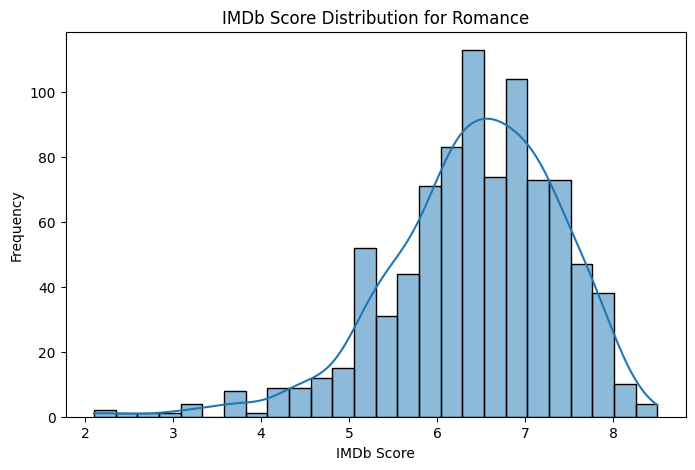

In [26]:
# Analyze top 5 genres
def analyze_top_genres(df):
    genres = df['genres'].str.split('|', expand=True).stack()
    top_genres = genres.value_counts().head(5)
    print("Top 5 Genres by Count:\n", top_genres)
    for genre in top_genres.index:
        genre_data = df[df['genres'].str.contains(genre)]
        print(f"\n{genre} Genre Summary Statistics:\n", genre_data['imdb_score'].describe())
        plt.figure(figsize=(8, 5))
        sns.histplot(genre_data['imdb_score'], kde=True)
        plt.title(f"IMDb Score Distribution for {genre}")
        plt.xlabel("IMDb Score")
        plt.ylabel("Frequency")
        plt.show()

analyze_top_genres(data)

In [27]:
# Describe key metrics: budget, gross, IMDb score
def descriptive_statistics(df):
    print("Descriptive Statistics:")
    print(df[['budget', 'gross', 'imdb_score']].describe())

descriptive_statistics(data)

Descriptive Statistics:
             budget         gross   imdb_score
count  3.857000e+03  3.857000e+03  3857.000000
mean   4.520189e+07  5.091264e+07     6.463806
std    2.233096e+08  6.930377e+07     1.053697
min    2.180000e+02  1.620000e+02     1.600000
25%    1.000000e+07  6.754898e+06     5.900000
50%    2.400000e+07  2.782987e+07     6.600000
75%    5.000000e+07  6.545231e+07     7.200000
max    1.221550e+10  7.605058e+08     9.300000


**Overall IMDB Scores**(includes all genres because horror genre ain't come in top5) and  **budget and gross revenue**

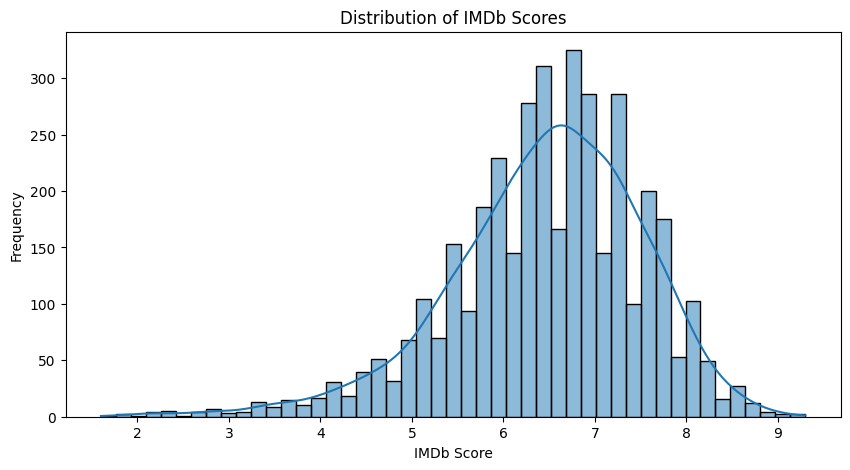

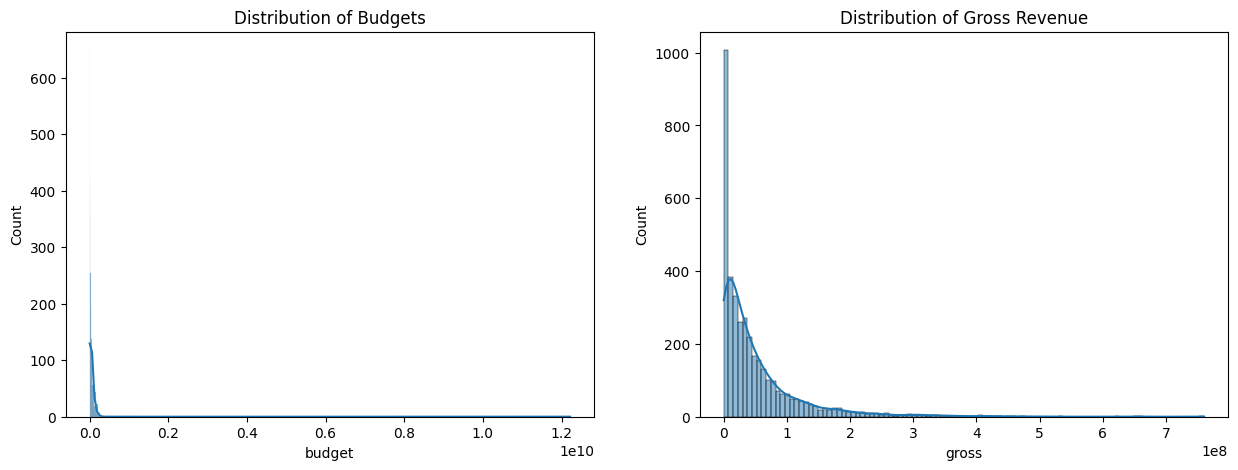

In [ ]:
#Distribution plot for key metrics

def plot_distributions(df):
    # Plot IMDb scores includes all genre's IMDB Scores
    plt.figure(figsize=(10, 5))
    sns.histplot(df['imdb_score'], kde=True)
    plt.title("Distribution of IMDb Scores")
    plt.xlabel("IMDb Score")
    plt.ylabel("Frequency")
    plt.show()

    # Plot budget and gross revenue
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df['budget'], kde=True, ax=ax[0])
    ax[0].set_title("Distribution of Budgets")
    sns.histplot(df['gross'], kde=True, ax=ax[1])
    ax[1].set_title("Distribution of Gross Revenue")
    plt.show()

plot_distributions(data)


### **Genre-Specific Analysis: Romance vs Horror**

Number of Romance movies: 880, Horror movies: 391


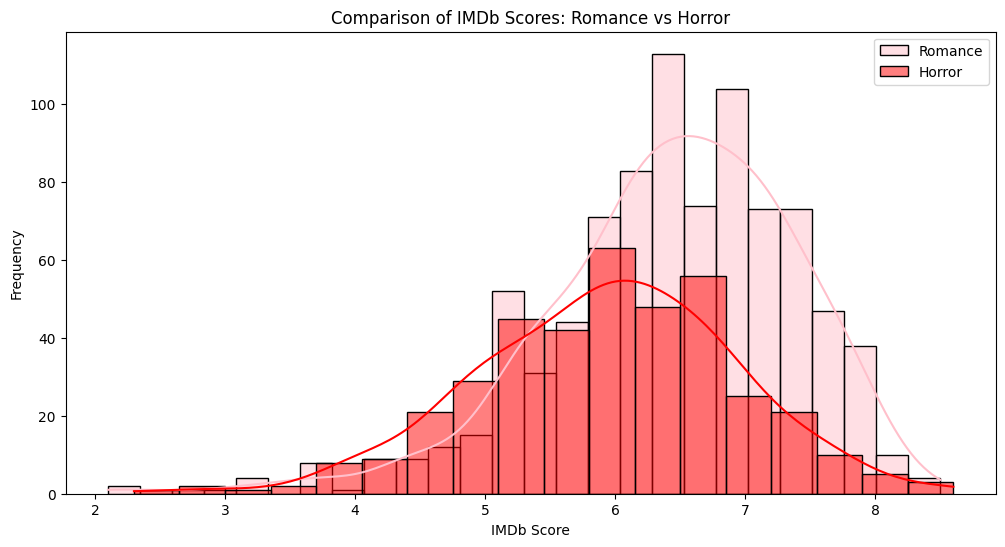

In [ ]:
# Filter data by genre and compare IMDb scores for Romance and Horror and gross earnings
romance_data = data[data['genres'].str.contains("Romance", case=False)]
horror_data = data[data['genres'].str.contains("Horror", case=False)]

print(f"Number of Romance movies: {len(romance_data)}, Horror movies: {len(horror_data)}")

# Compare IMDB score distributions
def compare_imdb_scores(romance, horror):
    plt.figure(figsize=(12, 6))
    sns.histplot(romance['imdb_score'], kde=True, color='pink', label='Romance')
    sns.histplot(horror['imdb_score'], kde=True, color='red', label='Horror')
    plt.title("Comparison of IMDb Scores: Romance vs Horror")
    plt.xlabel("IMDb Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

compare_imdb_scores(romance_data, horror_data)

# **Statistical Analysis and Hypothesis Testing**

### **Hypothesis Testing on IMDb Scores**

In [30]:
# Perform T-test to see if there's a significant difference in IMDb scores between genres
t_stat, p_val = ttest_ind(romance_data['imdb_score'], horror_data['imdb_score'], nan_policy='omit')
print(f"T-test result on IMDb scores:\nT-statistic: {t_stat}, P-value: {p_val}")

T-test result on IMDb scores:
T-statistic: 8.434820901914293, P-value: 8.91394609142643e-17


### **Testing Gross Profitability by Genre**

In [31]:
# T-test for gross earnings
t_stat_gross, p_val_gross = ttest_ind(romance_data['gross'], horror_data['gross'], nan_policy='omit')
print(f"T-test result on Gross Earnings:\nT-statistic: {t_stat_gross}, P-value: {p_val_gross}")

T-test result on Gross Earnings:
T-statistic: 2.9731156773334577, P-value: 0.0030035595866651364


### **Director and Actor Recommendation**

In [32]:
# Most frequent director and actor in high-grossing movies for Romance and Horror
def recommend_person(df, genre, column):
    genre_data = df[df['genres'].str.contains(genre, case=False)]
    top_person = genre_data[column].mode()[0]
    print(f"Recommended {column} for {genre}: {top_person}")

recommend_person(data, 'Romance', 'director_name')
recommend_person(data, 'Horror', 'director_name')
recommend_person(data, 'Romance', 'actor_1_name')
recommend_person(data, 'Horror', 'actor_1_name')

Recommended director_name for Romance: Woody Allen
Recommended director_name for Horror: Wes Craven
Recommended actor_1_name for Romance: J.K. Simmons
Recommended actor_1_name for Horror: Johnny Depp
